In [1]:
import numpy as np
from scipy import misc
import cv2
import csv
import pickle
import os
import argparse
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, model_from_json, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils, Sequence
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers import GRU, LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import losses

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from ModisUtils.misc import *

In [3]:
timeSteps = 8
test_data, test_target = get_data(data_type='test', reservoirIndex=0, timeSteps=timeSteps)

Restore test from cache!


In [4]:
test_data.shape

(60, 8, 513, 513, 1)

In [5]:
test_target.shape

(60, 513, 513, 1)

In [6]:
filters = 20
kernel_size = 7
n_hidden_layers = 3
img_row = 20
img_col = 20
input_shape = (None, 20, 20, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 20, 20, 20)  82400     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 20, 20, 20)  80        
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 20, 20, 20)  156880    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 20, 20, 20)  80        
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 20, 20, 20)  156880    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 20, 20, 20)  80        
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 20, 20, 20)  156880    
__________

In [8]:
scaler = MinMaxScaler()
scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

In [9]:
which = np.random.randint(test_data.shape[0])

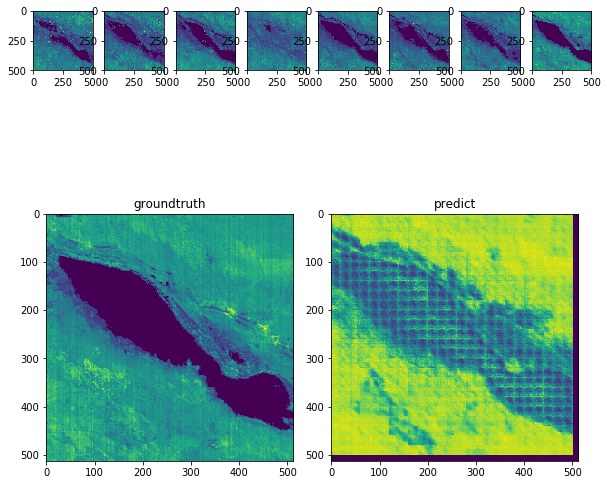

In [10]:
predictAndVisualize_RandomCrop(which=which, 
                               reservoir_index=0, 
                               test_data=test_data, 
                               test_target=test_target,
                               model=model,
                               crop_size=20)

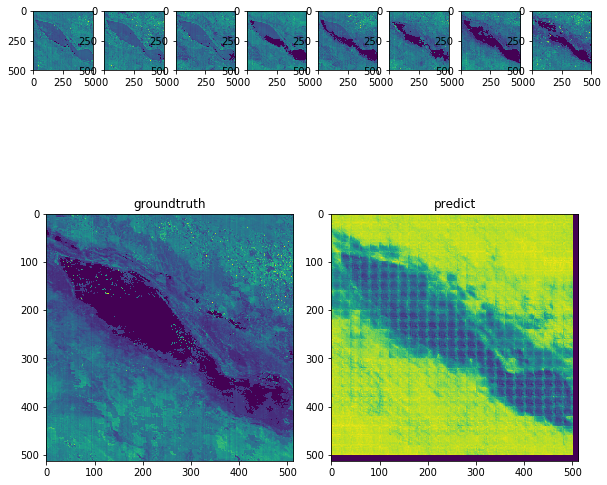

In [11]:
predictAndVisualize_RandomCrop(which=22, 
                               reservoir_index=0, 
                               test_data=test_data, 
                               test_target=test_target,
                               model=model,
                               crop_size=20)

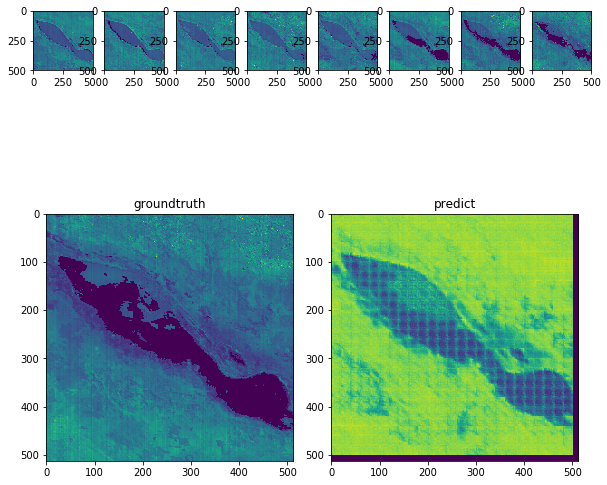

In [12]:
predictAndVisualize_RandomCrop(which=20, 
                               reservoir_index=0, 
                               test_data=test_data, 
                               test_target=test_target,
                               model=model,
                               crop_size=20)